In [1]:
import sys
import os
sys.path.append('..')

# Change to project root directory
os.chdir('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processing import DataProcessor

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

print(f"Directory: {os.getcwd()}")

Directory: c:\Users\ADMIN\Portfolio\Safaricom-churn-intelligence


In [2]:
processor = DataProcessor()
df_raw = processor.load_raw_data()

print(f"Dataset Shape: {df_raw.shape}")
print(f"Columns: {df_raw.shape[1]}")
print(f"Rows: {df_raw.shape[0]:,}")

[2026-02-19 15:23:28,892] INFO: DataProcessor initialized
[2026-02-19 15:23:28,986] INFO: Successfully loaded data from data/raw/telco_customer_churn.csv
[2026-02-19 15:23:28,987] INFO: Dataset shape: (7043, 21)
[2026-02-19 15:23:28,989] INFO: Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


Dataset Shape: (7043, 21)
Columns: 21
Rows: 7,043


In [3]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [5]:
missing = df_raw.isnull().sum()

if missing.sum() == 0:
    print("No missing values")
else:
    print(f"Missing values found:\n{missing[missing > 0]}")

No missing values


In [9]:
duplicates = df_raw.duplicated().sum()
print(duplicates)

0


In [10]:
churn_counts = df_raw['Churn'].value_counts()
churn_pct = df_raw['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(churn_counts)
print(f"\nChurn Rate: {churn_pct['Yes']:.2f}%")

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


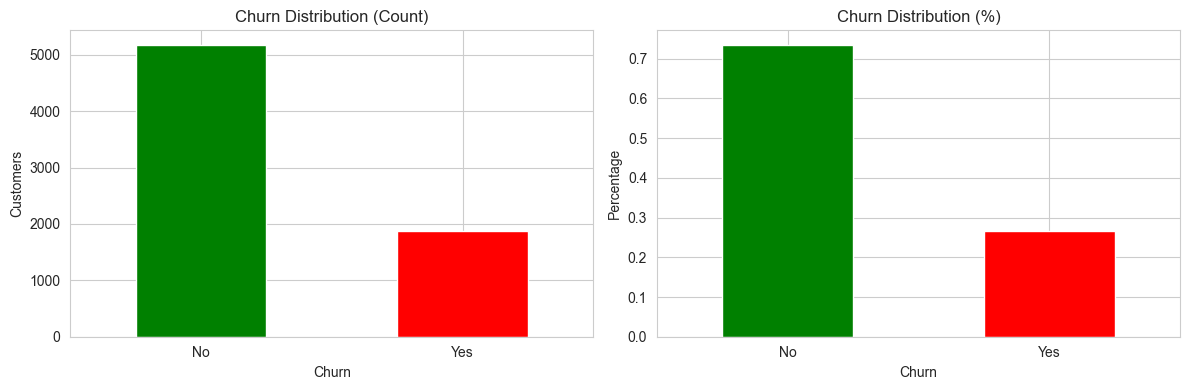

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_raw['Churn'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Churn Distribution (Count)')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Customers')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

df_raw['Churn'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], color=['green', 'red'])
ax[1].set_title('Churn Distribution (%)')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Percentage')
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

In [12]:
df_clean = processor.clean_data(df_raw)

print(f"Original shape: {df_raw.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {df_raw.shape[0] - df_clean.shape[0]}")

[2026-02-19 15:56:52,995] INFO: Starting data cleaning...
[2026-02-19 15:56:53,045] INFO: Dropped 0 rows with missing values
[2026-02-19 15:56:53,100] INFO: Removed 0 duplicate rows
[2026-02-19 15:56:53,198] INFO: Churn distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
[2026-02-19 15:56:53,200] INFO: Data cleaning complete. Final shape: (7043, 21)


Original shape: (7043, 21)
Cleaned shape: (7043, 21)
Rows removed: 0


In [13]:
summary = processor.get_data_summary(df_clean)

print(f"Total Customers: {summary['total_customers']:,}")
print(f"Churned: {summary['churned_customers']:,} ({summary['churn_rate']:.1%})")
print(f"Features: {len(summary['numeric_columns'])} numeric, {len(summary['categorical_columns'])} categorical")

Total Customers: 7,043
Churned: 1,869 (26.5%)
Features: 5 numeric, 16 categorical


In [14]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000
